In [65]:
#To dispay all output in a cell rather than the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [584]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
from scipy import stats

# File to Load (Remember to Change These)
file_to_load = "Resources/purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)

## Player Count
* Display the total number of players

In [245]:
pd.DataFrame([{"Total Players":len(purchase_data.SN.unique())}])

,Total Players
0,576


## Purchasing Analysis (Total)
* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [246]:
#Number of Unique Items <- len(purchase_data["Item Name"].unique()
#Average Price <- purchase_data.Price.mean()
#Number of Purchases <- purchase_data.shape[0]
#Total Reveniew <- purchase_data.Price.sum()
#Convert some values to string for dispay
#Display
Summary = pd.DataFrame([{'Number of Unique Items':len(purchase_data["Item Name"].unique()), 'Average Price':purchase_data.Price.mean(), 'Number of Purchases':purchase_data.shape[0], 'Total Revenue':purchase_data.Price.sum()}]) 
Summary = pd.DataFrame([[Summary.iloc[0,0], "${:,.2f}".format(Summary.iloc[0,1]), Summary.iloc[0,2], "${:,.2f}".format(Summary.iloc[0,3])]], columns=Summary.columns.to_list())
Summary
                 
                       

,Number of Unique Items,Average Price,Number of Purchases,Total Revenue
0,179,$3.05,780,"$2,379.77"


## Gender Demographics
* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed

In [247]:
#We need to take unique SNs, then calculte the value counts and percentages
#Value counts = Gender_DF['Gender'].value_counts()
#Perc counts = (100*Gender_DF['Gender'].value_counts(normalize=True))
#Format the perc count using map function
#Concatinate these two counts together
#Give column names as [Total Count, Percentage of Players]
#Display
Gender_DF = purchase_data[['SN', 'Gender']].groupby('SN').first() #Index - Unique SNs, Column - Gender
Gender_Demographics = pd.concat([Gender_DF['Gender'].value_counts(), (100*Gender_DF['Gender'].value_counts(normalize=True)).map("{:,.2f}%".format)], axis=1) 
Gender_Demographics.columns = ['Total Count', 'Percentage of Players']
Gender_Demographics


,Total Count,Percentage of Players
Male,484,84.03%
Female,81,14.06%
Other / Non-Disclosed,11,1.91%


## Purchasing Analysis (Gender)
* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [248]:
#purchase count : Total purchases made by male, female, other/non-disclosed
#Total Purchase Value: Total purchases made by male, female, other/non-disclosed
#avg. purchase price : Avg purchases made by male, female, other/non-disclosed => Total Purchase Value/ purchase count for each category
#Obtain PA_Summary1 with appropriate column names

#Avg Total Purchase per Person: 
#Calculate Total purchase made by each member, group them based on male, femele, other/non-disclosed, calculate the average
#Obtain PA_Summary2 with appropriate column names

#Format the columns using apply function

#Concatinate these two counts together
#Display

PA_Summary1 = purchase_data[['Gender', 'Price']].groupby('Gender').agg(['count', 'mean', 'sum'])
PA_Summary1.columns = ['Purchase Count','Average Purchase Price','Total Purchase Value']
PA_Per_Person = purchase_data[['SN','Gender', 'Price']].groupby('SN').agg({'Gender':'first', 'Price':'sum'})
PA_Summary2 = PA_Per_Person.groupby('Gender').agg('mean')
PA_Summary2.columns = ['Avg Total Purchase per Person']
PA_Summary1 = PA_Summary1.apply({'Purchase Count': lambda x:x,'Average Purchase Price':"${:,.2f}".format, 'Total Purchase Value':"${:,.2f}".format})
PA_Summary2 = PA_Summary2.apply({'Avg Total Purchase per Person':"${:,.2f}".format})
PA_Summary = pd.concat([PA_Summary1, PA_Summary2], axis=1)
PA_Summary

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Gender,,,,
Female,113,$3.20,$361.94,$4.47
Male,652,$3.02,"$1,967.64",$4.07
Other / Non-Disclosed,15,$3.35,$50.19,$4.56


## Age Demographics
* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [303]:
#Group the Players based on SN, take age as column
#Cut the Age into bins [<10 , 10-14 , 15-19 , 20-24 , 25-29 , 30-34 , 35-39 , 40+] and save as a new column
#Group the Age_Grouping DF by Age-Group col and take the "count of Age"->"Number of rows", 
#Add %of Players col using apply function
#Format %of Players for display
#Rename Index and Columns appropriately

Age_Grouping = purchase_data[['SN', 'Age']].groupby('SN').agg('first')
Age_Grouping['Age-Group'] = pd.cut(Age_Grouping.Age, bins=[-np.inf] + list(range(10, 41, 5)) + [np.inf], right=False, labels=['<10']+[f"{i}-{i+4}" for i in range(10, 36, 5)]+['40+'])
Age_Demographics = Age_Grouping.groupby('Age-Group').agg({'Age':'count'})
Age_Demographics['%'] = Age_Demographics['Age'].apply(lambda x: "{:.2f}%".format(100*x/Age_Demographics['Age'].sum()))
Age_Demographics.index.name = ''
Age_Demographics.rename(columns={'Age':'Total Count', '%':'Percentage of Players'})


,Total Count,Percentage of Players
,,
<10,17,2.95%
10-14,22,3.82%
15-19,107,18.58%
20-24,258,44.79%
25-29,77,13.37%
30-34,52,9.03%
35-39,31,5.38%
40+,12,2.08%


## Purchasing Analysis (Age)


In [333]:
#Take a slice of purchase_data with only SN, Age and Price columns
#Cut the Age into bins [<10 , 10-14 , 15-19 , 20-24 , 25-29 , 30-34 , 35-39 , 40+] and save as a new column
#Now, this task is similar to the Purchasing Analysis we have done for gender

#purchase count : Total purchases made by all 8 age range categories
#Total Purchase Value: Total purchases made by all 8 age range categories
#avg. purchase price : Avg purchases made by all 8 age range categories => Total Purchase Value/ purchase count for each category
#Obtain PA_Age_Summary1 with appropriate column names

#Avg Total Purchase per Person: 
#Calculate Total purchase made by each member, group them based on all 8 age range categories, calculate the average
#Obtain PA_Age_Summary2 with appropriate column names

#Format the columns using apply function

#Concatinate these two counts together
#Display

PA_Age_Frame = purchase_data[['SN', 'Age', 'Price']].copy()
PA_Age_Frame['Age Ranges'] = pd.cut(PA_Age_Frame.Age, bins=[-np.inf] + list(range(10, 41, 5)) + [np.inf], right=False, labels=['<10']+[f"{i}-{i+4}" for i in range(10, 36, 5)]+['40+'])
PA_Age_Summary1 = PA_Age_Frame.groupby('Age Ranges').agg({'Price':['count', 'mean', 'sum']})
PA_Age_Summary1.columns = ['Purchase Count','Average Purchase Price','Total Purchase Value']
PA_Age_Per_Person = PA_Age_Frame[['SN','Age Ranges', 'Price']].groupby('SN').agg({'Age Ranges':'first', 'Price':'sum'})
PA_Age_Summary2 = PA_Age_Per_Person.groupby('Age Ranges').agg('mean')
PA_Age_Summary2.columns = ['Avg Total Purchase per Person']
PA_Age_Summary1 = PA_Age_Summary1.apply({'Purchase Count': lambda x:x,'Average Purchase Price':"${:,.2f}".format, 'Total Purchase Value':"${:,.2f}".format})
PA_Age_Summary2 = PA_Age_Summary2.apply({'Avg Total Purchase per Person':"${:,.2f}".format})
PA_Age_Summary = pd.concat([PA_Age_Summary1, PA_Age_Summary2], axis=1)
PA_Age_Summary

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Age Ranges,,,,
<10,23,$3.35,$77.13,$4.54
10-14,28,$2.96,$82.78,$3.76
15-19,136,$3.04,$412.89,$3.86
20-24,365,$3.05,"$1,114.06",$4.32
25-29,101,$2.90,$293.00,$3.81
30-34,73,$2.93,$214.00,$4.12
35-39,41,$3.60,$147.67,$4.76
40+,13,$2.94,$38.24,$3.19


## Top Spenders
* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame

In [320]:
#Calculate Total number of purchases, Average Purchase price and Total Purchase value made by each member by grouping based on SN. 
#Name columns appropriately
#Sort DF based on Total Purchase Value in descending order
#Format for display

Spenders = purchase_data[['SN', 'Price']].groupby('SN').agg({'Price':['count', 'mean', 'sum']})
Spenders.columns = ['Purchase Count','Average Purchase Price','Total Purchase Value']
Top_Spender = Spenders.sort_values(by='Total Purchase Value', axis=0, ascending=False, inplace=False)
Top_Spender = Top_Spender.apply({'Purchase Count': lambda x:x, 'Average Purchase Price':"${:,.2f}".format, 'Total Purchase Value':"${:,.2f}".format})   
Top_Spender.head()


,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,$3.79,$18.96
Idastidru52,4,$3.86,$15.45
Chamjask73,3,$4.61,$13.83
Iral74,4,$3.40,$13.62
Iskadarya95,3,$4.37,$13.10


## Most Popular Items
* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame

In [328]:
#Group the slice of data frame with both 'Item ID' and 'Item Name'
#NOTE:- Note that same items are sold with different prices e.g. purchase_data[purchase_data['Item Name']=="Final Critic"]
#Hence Item Price is taken as average price of the item
#Rename the columns appropriately
#Sort DF based on Purchase Count in descending order
#Format for display

Items = purchase_data[['Item ID', 'Item Name', 'Price']].groupby(['Item ID', 'Item Name']).agg({'Price':['count', 'mean', 'sum']})    
Items.columns = ['Purchase Count', 'Item Price', 'Total Purchase Value']
Most_Popular_Items = Items.sort_values(by='Purchase Count', axis=0, ascending=False, inplace=False)
Most_Popular_Items = Most_Popular_Items.apply({'Purchase Count': lambda x:x, 'Item Price':"${:,.2f}".format, 'Total Purchase Value':"${:,.2f}".format})
Most_Popular_Items.head()


,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
92,Final Critic,13,$4.61,$59.99
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
145,Fiery Glass Crusader,9,$4.58,$41.22
132,Persuasion,9,$3.22,$28.99
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77


## Most Profitable Items
* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame





In [331]:
#Items DF contain the Purchase Count, Item Price, Total Purchase Value for each item
# Sort Items based on Total Purchase
# Format the data and dispay
Most_Profitable_Items = Items.sort_values(by='Total Purchase Value', axis=0, ascending=False, inplace=False)
Most_Profitable_Items = Most_Profitable_Items.apply({'Purchase Count': lambda x:x, 'Item Price':"${:,.2f}".format, 'Total Purchase Value':"${:,.2f}".format})
Most_Profitable_Items.head()

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
92,Final Critic,13,$4.61,$59.99
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
82,Nirvana,9,$4.90,$44.10
145,Fiery Glass Crusader,9,$4.58,$41.22
103,Singed Scalpel,8,$4.35,$34.80


# Report 

* Though, male players outnumber females and the other category, a key point to note here is that average female player spending is more than that of a male player both in terms of purchase value and count. This means, the gaming company need to market more to attract female players as they tend to purchase more. (Please note that the gender category of "others/Non-Disclosed" is only less than 2%. Hence it is not appropriate to derive conclusions about them as the data is not enough).

* Majority of players belong to the 20-24 Age group. Though these players are the ones who buy the most (1.41 purchases / person) compared to others, they are buying cheaper compared to high spending age groups 35-39 and <10. The same behavior can be observed by 30-34 age group also. Hence, these age groups (20-24 & 30-34) can be targeted with discounts. They will buy more in number but with moderate prices. We can also see that, the age groups 35-39 and <10 are the ones who spend the most (4.76 and 4.54 per person respectively). However, they are only 8% of the total players. There is a huge opportunity if the company could market effectively to attract these groups as they tend to purchase more.

* The most popular and profitable items are "Final Critic" and "Oathbreaker, Last Hope of the Breaking Storm". They are sold not because of low price. Both of them are expensive, compared to other items (placed above 80% of all product prices). Still, players are buying them considerably; means, there are some unique features in those products that help the players cross certain stages or achieve some popular targets. The company shall experiment on increasing the prices of these products, also introduce products with similar features and price ranges.

### Colclusion 1 helper
* Though, male players outnumber females and the other category, a key point to note here is that average female player spending is more than that of a male player both in terms of purchase value and count. This means, the gaming company need to market more to attract female players as they tend to purchase more. (Please note that the gender category of "others/Non-Disclosed" is only less than 2%. Hence it is not appropriate to derive conclusions about them as the data is not enough).

In [461]:
A_Summary1 = purchase_data[['Gender', 'Price']].groupby('Gender').agg(['count', 'mean', 'sum'])
PA_Summary1.columns = ['Purchase Count','Average Purchase Price','Total Purchase Value']
PA_Per_Person = purchase_data[['SN','Gender', 'Price']].groupby('SN').agg({'Gender':'first', 'Price':['sum', 'count']})
PA_Per_Person.columns = ['Gender', 'Total Purchase Value per Person', 'Total Purchase Count per Person']
PA_Summary2 = PA_Per_Person.groupby('Gender').agg('mean')
PA_Summary2.columns = ['Avg Purchase Value per Person', 'Avg Purchase Count per Person']
PA_Summary2 = PA_Summary2.apply({'Avg Purchase Value per Person':"${:,.2f}".format, 'Avg Purchase Count per Person':"${:,.2f}".format})  
PA_Summary2                              
            

,Avg Purchase Value per Person,Avg Purchase Count per Person
Gender,,
Female,$4.47,$1.40
Male,$4.07,$1.35
Other / Non-Disclosed,$4.56,$1.36


### Colclusion 2 helper
* Majority of players belong to the 20-24 Age group. Though these players are the ones who buy the most (1.41 purchases / person) compared to others, they are buying cheaper compared to high spending age groups 35-39 and <10. The same behavior can be observed by 30-34 age group also. Hence, these age groups (20-24 & 30-34) can be targeted with discounts. They will buy more in number but with moderate prices. We can also see that, the age groups 35-39 and <10 are the ones who spend the most (4.76 and 4.54 per person respectively). However, they are only 8% of the total players. There is a huge opportunity if the company could market effectively to attract these groups as they tend to purchase more.

In [485]:
#To see "Average Total purchase Value per person" and "Average Total purchase Count per person" at various age groups
PA_Age_Frame = purchase_data[['SN', 'Age', 'Price']].copy()
PA_Age_Frame['Age Ranges'] = pd.cut(PA_Age_Frame.Age, bins=[-np.inf] + list(range(10, 41, 5)) + [np.inf], right=False, labels=['<10']+[f"{i}-{i+4}" for i in range(10, 36, 5)]+['40+'])   


#Please note that somehow PA_Age_Frame[['SN', 'Age Ranges', 'Price']].groupby('SN').agg({ 'Price':['sum', 'count'], 'Age Ranges':'first'}) is not 
#producing the desired result in my version of pandas. Hence, I am using a workaround for this
PA_Age_Frame1= PA_Age_Frame[['SN', 'Age Ranges', 'Price']].groupby('SN').agg({ 'Price':['sum', 'count']}) 
PA_Age_Frame1.columns = ['Total Purchase Value','Purchase Count']
PA_Age_Frame2 = PA_Age_Frame[['SN', 'Age Ranges']].groupby('SN').first()
#Join both the frames above
PA_Age_Frame_per_player =  PA_Age_Frame1.join(PA_Age_Frame2, how="inner")
#To get the avg per age group
PA_Age_per_player = PA_Age_Frame_per_player.groupby('Age Ranges').agg('mean')
PA_Age_per_player.columns = ['Avg Total Purchase Value per Person', 'Avg Total Purchase Count per Person']
#Sorting and Visualization
Sorted_Value_PA_Age_per_player = PA_Age_per_player.sort_values(by = 'Avg Total Purchase Value per Person', ascending=False)
Sorted_Count_PA_Age_per_player= PA_Age_per_player.sort_values(by = 'Avg Total Purchase Count per Person', ascending=False)
PA_Age_per_player = PA_Age_per_player.apply({'Avg Total Purchase Value per Person':"${:,.2f}".format, 'Avg Total Purchase Count per Person':"{:,.2f}".format})
Sorted_Value_PA_Age_per_player = Sorted_Value_PA_Age_per_player.apply({'Avg Total Purchase Value per Person':"${:,.2f}".format, 'Avg Total Purchase Count per Person':"{:,.2f}".format})
Sorted_Count_PA_Age_per_player = Sorted_Count_PA_Age_per_player.apply({'Avg Total Purchase Value per Person':"${:,.2f}".format, 'Avg Total Purchase Count per Person':"{:,.2f}".format})
#Display
Sorted_Value_PA_Age_per_player
Sorted_Count_PA_Age_per_player

,Avg Total Purchase Value per Person,Avg Total Purchase Count per Person
Age Ranges,,
35-39,$4.76,1.32
<10,$4.54,1.35
20-24,$4.32,1.41
30-34,$4.12,1.40
15-19,$3.86,1.27
25-29,$3.81,1.31
10-14,$3.76,1.27
40+,$3.19,1.08


,Avg Total Purchase Value per Person,Avg Total Purchase Count per Person
Age Ranges,,
20-24,$4.32,1.41
30-34,$4.12,1.40
<10,$4.54,1.35
35-39,$4.76,1.32
25-29,$3.81,1.31
10-14,$3.76,1.27
15-19,$3.86,1.27
40+,$3.19,1.08


20-24    0.447917
15-19    0.185764
25-29    0.133681
30-34    0.090278
35-39    0.053819
10-14    0.038194
<10      0.029514
40+      0.020833
Name: Age Ranges, dtype: float64

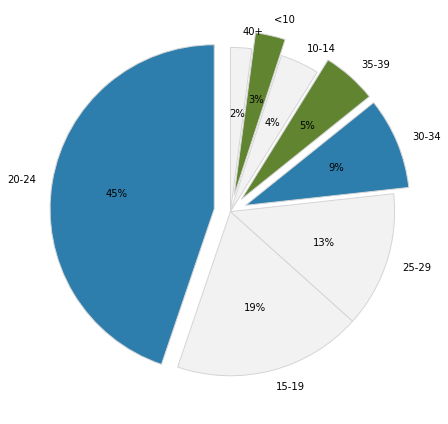

In [618]:
#To visualize the proportion of players at various age groups
_ = plt.figure(figsize=(8,6))
Proportion = PA_Age_Frame_per_player['Age Ranges'].value_counts(normalize=True)
_ = plt.pie(Proportion,
            labels=Proportion.index,
            explode=(0.1,0,0,0.1,0.1,0,0.1,0), 
            startangle=90,
            colors = ['#2D7EAC', '#F2F2F2', '#F2F2F2', '#2D7EAC', '#60842F', '#F2F2F2', '#60842F', '#F2F2F2'],
            wedgeprops={"edgecolor":"#D6D6D6",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True},
            # with the percent listed as a fraction
            autopct='%.0f%%')                            

# View the plot (Decimal places are approximated to nearest integer)
plt.tight_layout()
Proportion


### Colclusion 3 helper
* The most popular and profitable items are "Final Critic" and "Oathbreaker, Last Hope of the Breaking Storm". They are sold not because of low price. Both of them are expensive, compared to other items (placed above 80% of all product prices). Still, players are buying them considerably; means, there are some unique features in those products that help the players cross certain stages or achieve some popular targets. The company shall experiment on increasing the prices of these products, also introduce products with similar features and price ranges.

In [605]:
Items = purchase_data[['Item ID', 'Item Name', 'Price']].groupby(['Item ID', 'Item Name']).agg({'Price':['count', 'mean', 'sum']})    
Items.columns = ['Purchase Count', 'Item Price', 'Total Purchase Value']
#Most popular Items without formatting
Most_Popular_Items = Items.sort_values(by='Purchase Count', axis=0, ascending=False, inplace=False)
Most_Popular_Items = Most_Popular_Items.apply({'Purchase Count': lambda x:x, 'Item Price':lambda x:round(x,2), 'Total Purchase Value':lambda x:round(x,2)})
Most_Popular_Items.head()
#Most profitable Items without formatting
Most_Profitable_Items = Items.sort_values(by='Total Purchase Value', axis=0, ascending=False, inplace=False)
Most_Profitable_Items = Most_Profitable_Items.apply({'Purchase Count': lambda x:x, 'Item Price':lambda x:round(x,2), 'Total Purchase Value':lambda x:round(x,2)})
Most_Profitable_Items.head()
#25% of the items are priced below 2 dollars
stats.percentileofscore(Most_Popular_Items['Item Price'], 2, kind='rank') #25.69
#50% of the items are priced below 3.1 dollars
stats.percentileofscore(Most_Popular_Items['Item Price'], 3.1, kind='rank') #50.83
#75% of the items are priced below 4.05 dollars
stats.percentileofscore(Most_Popular_Items['Item Price'], 4.05 , kind='rank') #75.41
#Final Critic is placed about 90% of the items placed at the ascending order of their prices
stats.percentileofscore(Most_Popular_Items['Item Price'], 4.61 , kind='rank') #89.94
#Oathbreaker, Last Hope of the Breaking Storm is placed about 80% of the items placed at the ascending order of their prices
stats.percentileofscore(Most_Popular_Items['Item Price'], 4.23 , kind='rank') #80.16

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
92,Final Critic,13,4.61,59.99
178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
145,Fiery Glass Crusader,9,4.58,41.22
132,Persuasion,9,3.22,28.99
108,"Extraction, Quickblade Of Trembling Hands",9,3.53,31.77


,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
92,Final Critic,13,4.61,59.99
178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
82,Nirvana,9,4.90,44.10
145,Fiery Glass Crusader,9,4.58,41.22
103,Singed Scalpel,8,4.35,34.80


25.69832402234637

50.83798882681564

75.41899441340782

89.94413407821229

80.16759776536313